In [ ]:
# Run only once
!git clone https://github.com/ModernOctave/MDPsim.git
%cd MDPsim
%pip install -r requirements.txt

In [2]:
from simulator import Simulator
from policies import MDPPolicy, GreedyPolicy
from matplotlib import pyplot as plt
import numpy as np
import tikzplotlib

beta: 0.001 cost:0.832285
beta: 0.005 cost:0.87598
beta: 0.01 cost:0.94833
beta: 0.05 cost:1.65062
beta: 0.1 cost:2.37943
beta: 0.15 cost:2.909205
beta: 0.2 cost:3.003815
beta: 0.3 cost:3.005555
beta: 0.4 cost:2.99702
beta: 0.001 cost:0.82884
beta: 0.005 cost:0.880235
beta: 0.01 cost:0.95139
beta: 0.05 cost:1.645785
beta: 0.1 cost:2.45073
beta: 0.15 cost:3.22532
beta: 0.2 cost:3.690735
beta: 0.3 cost:5.174525
beta: 0.4 cost:6.384005


AttributeError: 'Legend' object has no attribute '_ncol'

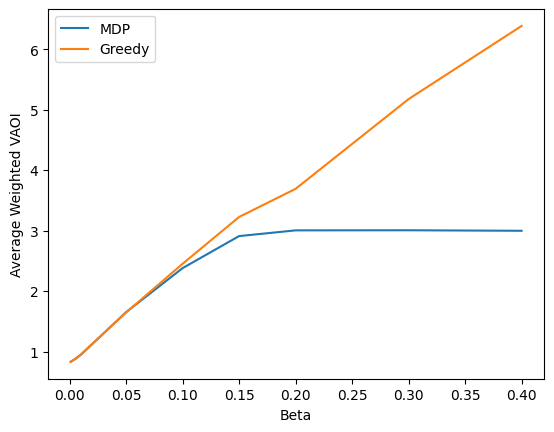

In [8]:
betas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]
max_vaoi = 10
h_values = [0.5, 1]
h_probs = [0.5, 0.5]
lambdas = [0.5, 0.5]

costs = []
for beta in betas:
	MDP = MDPPolicy(max_vaoi, h_values, h_probs, lambdas, beta=beta)
	sim = Simulator(h_values, h_probs, lambdas, beta=beta)
	sim.evaluate(MDP)
	costs.append(np.mean(sim.wvaoi))
	print(f"beta: {beta} cost:{costs[-1]}")
plt.plot(betas, costs)

costs = []
for beta in betas:
	GRE = GreedyPolicy(h_values, h_probs, lambdas, beta=beta)
	sim = Simulator(h_values, h_probs, lambdas, beta=beta)
	sim.evaluate(GRE, n=100_000)
	costs.append(np.mean(sim.wvaoi))
	print(f"beta: {beta} cost:{costs[-1]}")
plt.plot(betas, costs)

plt.xlabel("Beta")
plt.ylabel("Average Weighted VAOI")
# plt.legend(["MDP", "Greedy"])		# Legend is not working in tikzplotlib
# plt.show()

tikzplotlib.save("fig1.tex")

AttributeError: 'Legend' object has no attribute '_ncol'

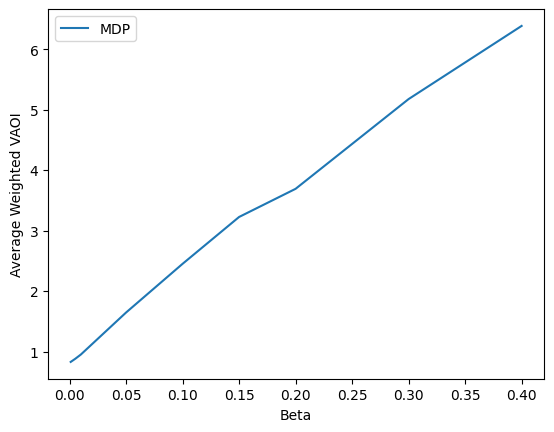

In [9]:
plt.plot(betas, costs)

plt.xlabel("Beta")
plt.ylabel("Average Weighted VAOI")
# plt.legend(["MDP", "Greedy"])		# Legend is not working in tikzplotlib
# plt.show()

tikzplotlib.save("fig1.tex")

w: 0 cost1:0.0 cost2:0.50792
w: 0.2 cost1:0.30114199999999997 cost2:0.429272
w: 0.4 cost1:0.455668 cost2:0.37399799999999994
w: 0.6 cost1:0.6867119999999999 cost2:0.24943199999999996
w: 0.8 cost1:0.8110959999999999 cost2:0.142962
w: 1 cost1:1.02335 cost2:0.0
w: 0 cost1:0.0 cost2:0.49957
w: 0.2 cost1:0.29970800000000003 cost2:0.42651999999999995
w: 0.4 cost1:0.44973600000000014 cost2:0.37474199999999996
w: 0.6 cost1:0.6865919999999999 cost2:0.24823599999999998
w: 0.8 cost1:0.7972640000000002 cost2:0.14264999999999997
w: 1 cost1:0.99817 cost2:0.0


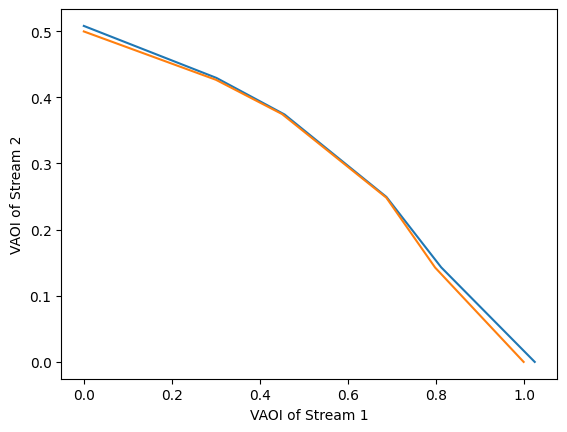

In [ ]:
beta = 0.005
ws = [0, 0.2, 0.4, 0.6, 0.8, 1]
max_vaoi = 10

cost1 = []
cost2 = []
for w in ws:
	GRE = MDPPolicy(max_vaoi, h_values, h_probs, lambdas, beta=beta, weights=[w, 1-w])
	sim = Simulator(h_values, h_probs, lambdas, beta=beta, weights=[w, 1-w])
	sim.evaluate(GRE)
	cost1.append(np.mean(sim.vaoi[0]))
	cost2.append(np.mean(sim.vaoi[1]))
	print(f"w: {w} cost1:{cost1[-1]} cost2:{cost2[-1]}")
plt.plot(cost1, cost2)

cost1 = []
cost2 = []
for w in ws:
	GRE = GreedyPolicy(h_values, h_probs, lambdas, beta=beta, weights=[w, 1-w])
	sim = Simulator(h_values, h_probs, lambdas, beta=beta, weights=[w, 1-w])
	sim.evaluate(GRE, n=100_000)
	cost1.append(np.mean(sim.vaoi[0]))
	cost2.append(np.mean(sim.vaoi[1]))
	print(f"w: {w} cost1:{cost1[-1]} cost2:{cost2[-1]}")
plt.plot(cost1, cost2)

plt.xlabel("VAOI of Stream 1")
plt.ylabel("VAOI of Stream 2")
plt.legend(["MDP", "Greedy"])
# plt.show()

tikzplotlib.save("fig2.tex")